# Objective 01 - explain the intuition behind backpropagation and gradient descent

Text(0, 0.5, 'y')

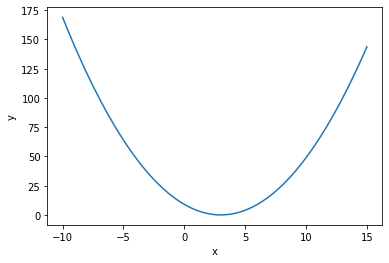

In [1]:
# Plot the function

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10, 15, 0.01)

# simple parabola equation y = (x - 3)^2
y = (x - 3)**2

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')


In [2]:
# initialize at x = 1
cur_x = 1

# learning rate (how much to adjust x each iteration)
rate = 0.05

# maximum number of iterations
max_iters = 25

# initialize iteration counter
iters = 0

# Gradient of the function
grad = lambda x: 2*(x-3)

while iters < max_iters:
  # set the previous x as the current
  prev_x = cur_x

  # calculate the 'new' current x with the gradient
  cur_x = prev_x - (rate * grad(prev_x))

  # advance the iteration counter
  iters = iters+1
  print("Iteration {} - x value: {}.".format(iters, cur_x))

# print out the final results
print("The local minimum occurs at", cur_x)

Iteration 1 - x value: 1.2.
Iteration 2 - x value: 1.38.
Iteration 3 - x value: 1.5419999999999998.
Iteration 4 - x value: 1.6877999999999997.
Iteration 5 - x value: 1.8190199999999999.
Iteration 6 - x value: 1.937118.
Iteration 7 - x value: 2.0434061999999997.
Iteration 8 - x value: 2.1390655799999996.
Iteration 9 - x value: 2.2251590219999997.
Iteration 10 - x value: 2.3026431198.
Iteration 11 - x value: 2.37237880782.
Iteration 12 - x value: 2.4351409270380002.
Iteration 13 - x value: 2.4916268343342.
Iteration 14 - x value: 2.54246415090078.
Iteration 15 - x value: 2.5882177358107024.
Iteration 16 - x value: 2.629395962229632.
Iteration 17 - x value: 2.6664563660066687.
Iteration 18 - x value: 2.6998107294060016.
Iteration 19 - x value: 2.7298296564654017.
Iteration 20 - x value: 2.7568466908188616.
Iteration 21 - x value: 2.7811620217369755.
Iteration 22 - x value: 2.8030458195632777.
Iteration 23 - x value: 2.82274123760695.
Iteration 24 - x value: 2.840467113846255.
Iteration 25

# Objective 02 - discuss the importance of batch size


In [3]:
# set the url fot the data location 
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

# load the dataset
dataset = np.loadtxt(url, delimiter=',')

# look at the size of the dataset
print(f'There are {len(dataset)} sample in the dataset')

# split into input (X) and output (y) variables
# 8 input columns and 1 target columns
X = dataset[:, 0:8]
y = dataset[:, 8]

# import keras 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the layers
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

There are 768 sample in the dataset


In [4]:
# Release the global memory state
tf.keras.backend.clear_session()

# Define the layers
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the batch size
size = 100

# Fit the model with different batch size
model.fit(X, y, epochs=100, batch_size=size, verbose=0)

# Evaluate the model
print(f'Model accuracy for batch size = {size}: ', model.evaluate(X, y)[1]*100)

24/24 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.7135
Model accuracy for batch size = 100:  71.35416865348816


In [5]:
# Release the global memory state
tf.keras.backend.clear_session()

# Define the layers
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the batch size
size = len(X)

# Fit the model with different batch size
model.fit(X, y, epochs=100, batch_size=size, verbose=0)

# Evaluate the model
print(f'Model accuracy for batch size = {size}: ', model.evaluate(X, y)[1]*100)

24/24 [==============================] - 0s 2ms/step - loss: 0.9643 - accuracy: 0.6680
Model accuracy for batch size = 768:  66.796875


### As we expected, the accuracy has decreased because we're using the whole data set as a batch. The error in the model is only updated once per epoch, so there are fewer opportunities for the model to adjust the error and learn a better fitting model.

# Objective 03 - discuss the importance of learning rate


In [6]:
# load the dataset
dataset = np.loadtxt(url, delimiter=',')

# look at the size of the dataset
print(f'There are {len(dataset)} samples in this dataset.')

# split into input(X) and output (y) variables
# 8 input columns and 1 target column
X = dataset[:, 0:8]
y = dataset[:, 8]

# Split into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

There are 768 samples in this dataset.


In [7]:
# Define the layers
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001) # learning rate loss but SGD is an optimizer like adam???
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit the model with validation data
lr_low = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0, validation_data=(X_test, y_test))

# evaluate the model 
print('Model accuracy for learning rate = 0.001: ', model.evaluate(X, y)[1]*100)


24/24 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6810
Model accuracy for learning rate = 0.001:  68.09895634651184


In [8]:
# Release global memory state
tf.keras.backend.clear_session()

# Define the layers
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
opt = SGD(lr=0.75)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model with different batch sizes
lr_high = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0,
                       validation_data=(X_test, y_test))

# Evaluate the model
print('Model accuracy for learning rate = 0.75:', model.evaluate(X, y)[1]*100)

24/24 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.6510
Model accuracy for learning rate = 0.75: 65.10416865348816


In [10]:
# Import plotting libraries and pandas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create an empty list to append each DataFrame
learn_rates = []

# Loop through the history of each model and create a DataFrame
for model, result in zip([lr_low, lr_high], ["0.0001_", "0.75_"]):

  df = pd.DataFrame.from_dict(model.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  learn_rates.append(df)

# Combine all the DataFrames
df = pd.concat(learn_rates)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()


,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,1.928876,0.446181,1.273116,0.432292,0,0.0001_
1,0.904345,0.614583,0.788852,0.656250,1,0.0001_
2,0.717144,0.668403,0.706897,0.640625,2,0.0001_
3,0.694721,0.656250,0.680648,0.645833,3,0.0001_
4,0.685395,0.673611,0.673880,0.661458,4,0.0001_


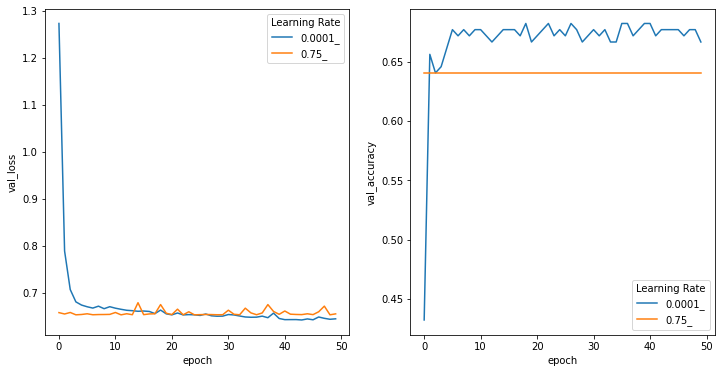

In [11]:

# Create the plot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df, ax=ax1)
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df, ax=ax2);

